<a href="https://colab.research.google.com/github/Vasco2510/AProgra2/blob/main/Lab_2_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de Clasificacion**

**Equipo:**
- Yuri Abel Escobar Perez 1 (100%)
- Integrante 2 (XX%)
- Integrante 3 (XX%)
- Integrante 4 (XX%)

# **Objetivos**
En este laboratorio, ustedes deberán:

1. Implementar dos algoritmos de clasificación desde cero.
2. Evaluar su desempeño utilizando la matriz de confusión y la puntuación F1.
3. Optimizar los modelos para lograr la mejor puntuación F1 posible en el conjunto de datos UCI Adult.

Recuerden en todos los pasos incluir una justificación sobre sus decisiones de diseño.

# **Deliverables**
Cada equipo deberá:

1. **Entregar el enlace de su notebook de Colab en Canvas.** Asegúrense de que el notebook esté bien comentado, mostrando su implementación, gráficas y discusión.
2. **Publicar un resumen corto en el foro del curso.** Compartan su mejor puntuación F1, la matriz de confusión de su modelo final y una nota breve sobre qué algoritmo tuvo mejor desempeño y por qué.

# **Dataset**

- El conjunto de datos UCI Adult Dataset predice si los ingresos de una persona superan los $50K anuales, en función de datos demográficos. El dataset contiene características categóricas y continuas.
- Entre las características se incluyen: edad, tipo de empleo, nivel educativo, estado civil, ocupación, raza, género y más.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Dataset URL: https://archive.ics.uci.edu/ml/datasets/adult
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data = pd.read_csv(url, header=None, names=column_names, na_values=" ?", sep=',')
data.dropna(inplace=True)

#### Checking our data


In [2]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:


conteo_total = data["native-country"].value_counts()
total_muestras = conteo_total.sum()

# 3. Calcular la cuenta de 'United-States'
conteo_us = conteo_total.get('United-States', 0) # Usa .get para seguridad si el nombre es ligeramente diferente

# 4. Sumar el resto (lo que no es 'United-States')
conteo_other = total_muestras - conteo_us

# 5. Crear la tabla de comparación de proporciones
print(conteo_other)
print(conteo_us)


,0
United-States,0
Other (Agrupado),30162


In [19]:
print("Shape:", data.shape)
print("\nMissing values per column:\n", data.isnull().sum())
print("\nClass distribution:\n", data['income'].value_counts(normalize=True))

###
print(data.dtypes)

###
#Lets see our unique values

for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


Shape: (30162, 15)

Missing values per column:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Class distribution:
 income
<=50K    0.751078
>50K     0.248922
Name: proportion, dtype: float64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
age: 72 unique values
workclass: 7 unique values
fnlwgt: 20263 unique values
education: 16 unique values
education-num: 16 unique values
marital-status:

- Con el comando previo observamos que no tenemos valores null en nuestra data. Asimismo, confirmamos las dimensiones de la misma (30162 filas, 15 columnas).
- Por otra parte mostramos la cantidad de valores unicos por cada una de las columnas. Ello nos facilitará aplicar encoding convenientemente a las features que lo requieran.
- Finalmente se identifico que nuestras columnas tienen los siguientes tipos de datos {int64, object}. Sabiendo ello podremos establecer adecuadas conversiones de tipo para hacer procesable y a provechable el dataset.


| Nombre de la Columna | Tipo de Dato (`dtype`) | Valores Únicos (Cardinalidad) | Valores Faltantes |
| :------------------- | :------------------- | :---------------------------- | :---------------- |
| **age** | `int64` | 72 | 0 |
| **workclass** | `object` | 7 | 0 |
| **fnlwgt** | `int64` | 20263 | 0 |
| **education** | `object` | 16 | 0 |
| **education-num** | `int64` | 16 | 0 |
| **marital-status** | `object` | 7 | 0 |
| **occupation** | `object` | 14 | 0 |
| **relationship** | `object` | 6 | 0 |
| **race** | `object` | 5 | 0 |
| **sex** | `object` | 2 | 0 |
| **capital-gain** | `int64` | 118 | 0 |
| **capital-loss** | `int64` | 90 | 0 |
| **hours-per-week** | `int64` | 94 | 0 |
| **native-country** | `object` | 41 | 0 |
| **income** | `object` | 2 | 0 |

- Por otra parte se ha identificado que tenemos un "imbalanced dataset". Esto es que una de las clases a clasificar, esta sobrerepresentada frente a la otra. Lo vemos en la siguiente tabla detalladamente.
| Income Class | Proportion |
|--------------|------------|
| <=50K       | 0.751078   |
| >50K        | 0.248922   |

In [9]:
data.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


A continuacion, analizaremos brevemente la distribución en histogramas, de las variables numéricas.

1. age (Edad)
- Tenemos pocas muestras con un "age" mayores a 60. Esta categoría se concentra en en ranfo de [25,50].

- Forma: La distribución es levemente sesgada a la derecha (o con una cola larga hacia las edades mayores), pero se acerca a una distribución normal.

- Implicación: Esto sugiere que la muestra del censo incluye una gran proporción de adultos jóvenes. La forma general es buena y la característica está lista para usarse en el modelo.

2. fnlwgt (Final Weight)
Dada nuestra investigación se averiguó que esta variable representa una **estimación del número de personas en los EE. UU. que son representadas por esa fila/individuo en particular en el conjunto de datos**. Es el peso de muestreo. Su forma altamente sesgada es común para este tipo de variables, pero reafirma que no debe usarse como característica predictiva en un modelo de clasificación de ingresos.

3. education-num (Nivel de Educación Numérico)
Forma: Múltiples picos (multimodal). La distribución no es suave, lo cual es de esperar ya que el education-num es una codificación de niveles de educación discretos (entero).

Picos Clave:

Un pico grande alrededor de 9 (High School Graduado).

Otro pico grande alrededor de 10 (Educación después de la secundaria/Algo de universidad).

Picos más pequeños pero significativos alrededor de 13 (Bachelors).

Implicación: Esta característica tiene una distribución excelente con valores bien separados. Es una variable clave y ya está en un formato muy útil para la modelización.

4. capital-gain (Ganancia de Capital)
Forma: Masivamente sesgada a la derecha con un pico enorme en 0.

Centro/Pico: Casi la totalidad de los datos se encuentran en el primer bin, que representa ganancia de capital de 0.

Implicación: Esta distribución revela un problema común de dispersión de datos; la característica es inútil para la mayoría de las personas, ya que es 0. Para usarla efectivamente en un modelo, a menudo se recomienda:

Transformación: Aplicar una transformación logarítmica (como log(1+x)).

Ingeniería de Características: Crear una nueva columna binaria (has_capital_gain) que sea 1 si capital-gain >0 y 0 en caso contrario.

5. capital-loss (Pérdida de Capital)
Forma: Idéntica a capital-gain: Masivamente sesgada a la derecha con un pico enorme en 0.

Centro/Pico: Casi la totalidad de los datos se encuentran en el primer bin, que representa pérdida de capital de 0.

Implicación: Al igual que capital-gain, la mayoría de las personas no tienen pérdida de capital. Se requerirá la misma ingeniería de características (transformación logarítmica y/o una bandera binaria) para que esta característica sea efectiva en un modelo.

6. hours-per-week (Horas por Semana)
Forma: Sesgada a la derecha con un pico dominante en 40.

Centro/Pico: El valor de 40 horas (una semana laboral a tiempo completo estándar) es, con diferencia, la respuesta más común. También hay picos notables en 20, 30 y otros múltiplos comunes.

Implicación: Esta es una característica muy importante. La alta frecuencia en 40 horas es de esperar. La asimetría significa que la media real es ligeramente mayor que 40 (debido a las personas que trabajan horas extras), pero la característica está en buen estado y lista para usarse.




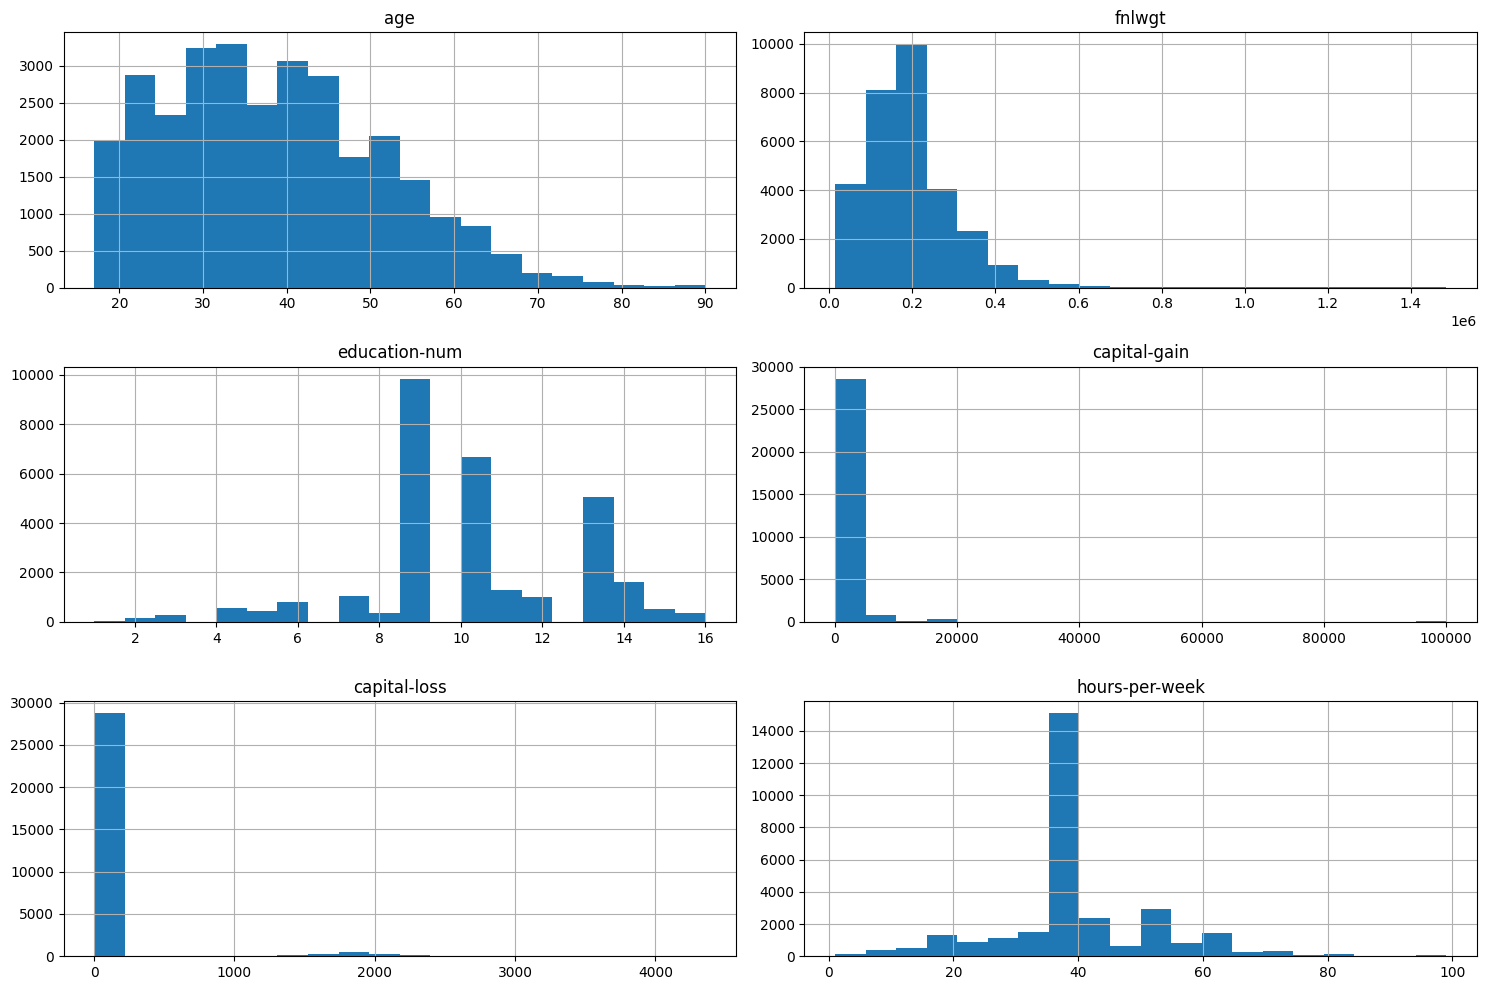

In [6]:
import matplotlib.pyplot as plt

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


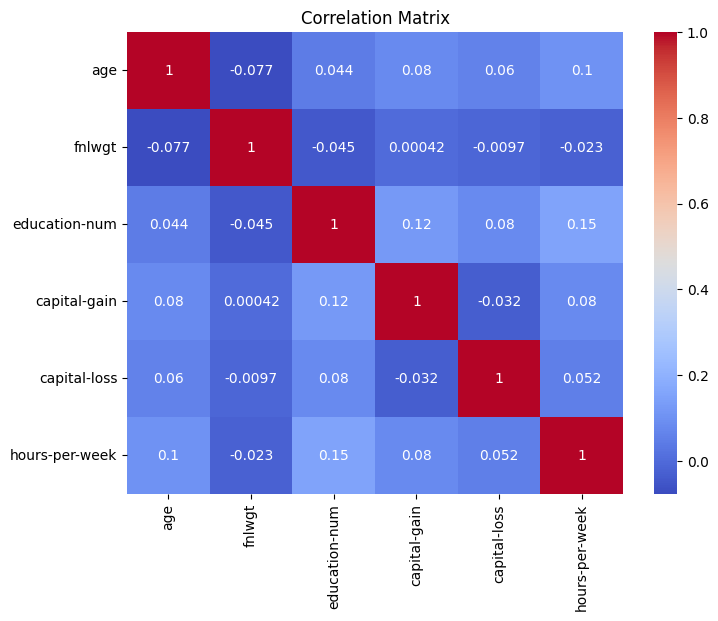

In [16]:
## verificar corelacion con matriz de correlacion
corr = data[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


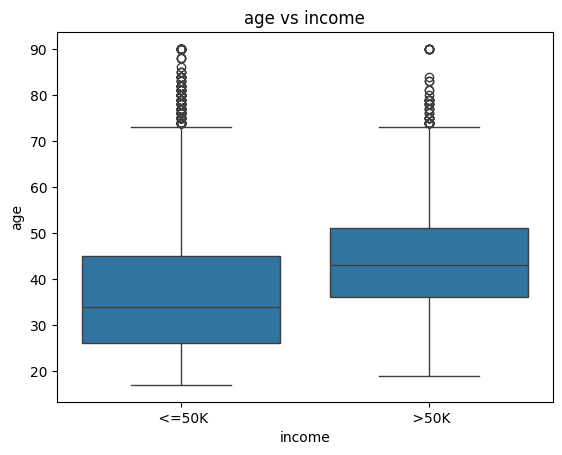

 /n


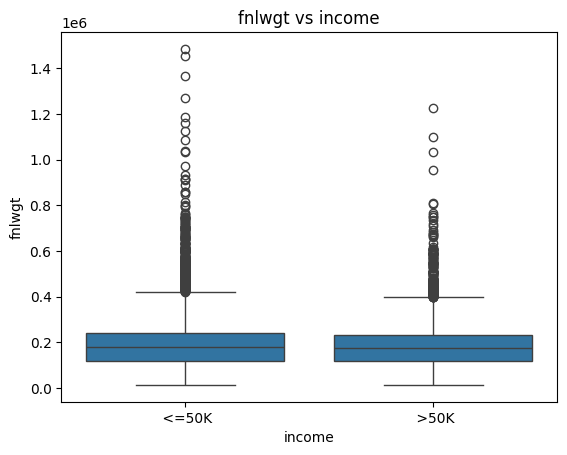

 /n


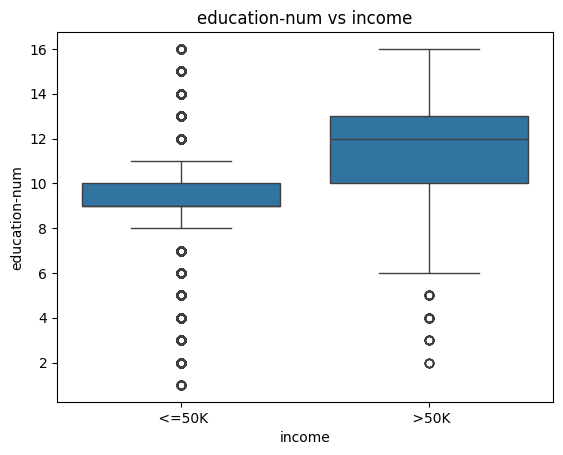

 /n


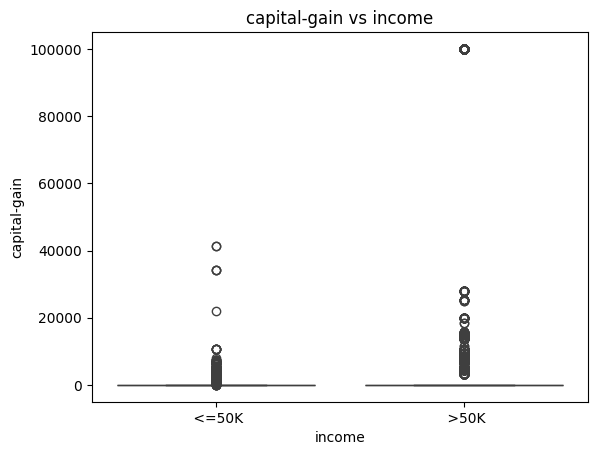

 /n


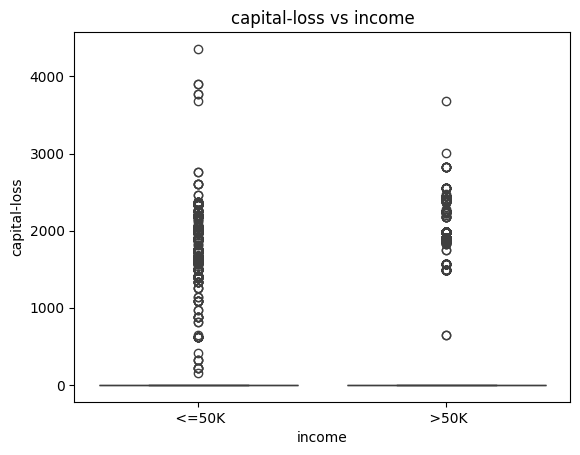

 /n


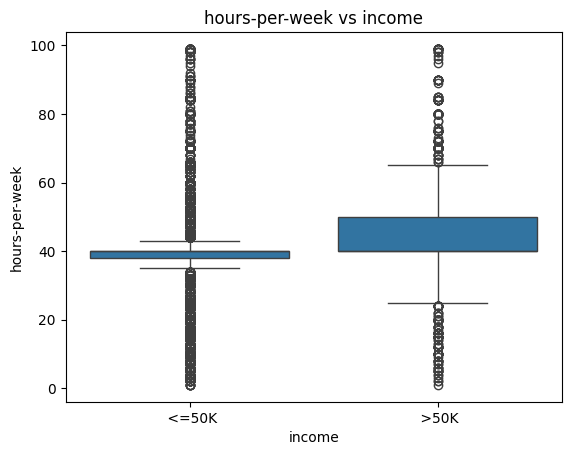

 /n


NameError: name 'categorical_cols' is not defined

In [7]:
## Relationship with Target Variable

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='income', y=col, data=data)
    plt.title(f"{col} vs income")
    plt.show()
    print(" /n")

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue='income', data=data,
                  order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs income")
    plt.show()


# **Tarea 1: Implementar dos algoritmos de clasificación (8 puntos)**

**Implementa dos algoritmos de clasificación desde cero.**

Tu implementación debe:
- Manejar tanto características continuas como categóricas.
- Utilizar un preprocesamiento adecuado.
- Ser probada en el conjunto de datos UCI Adult.

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# Separate features and target
X = data.drop('income', axis=1)
y = (data['income'] == ' >50K').astype(int)  # binary target

# Detect numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Log-transform skewed variables (avoid log(0))
X['capital-gain'] = np.log1p(X['capital-gain'])
X['capital-loss'] = np.log1p(X['capital-loss'])


In [10]:
# Preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [12]:
# Fit and transform
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("Transformed training shape:", X_train_preprocessed.shape)
print("Transformed test shape:", X_test_preprocessed.shape)


Transformed training shape: (21113, 104)
Transformed test shape: (9049, 104)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import pandas as pd

# Definir clasificadores en un diccionario
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Gaussian NB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [14]:
results = []

for name, clf in models.items():
    # Nota: GaussianNB no acepta sparse matrices -> convertimos a denso
    if name == "Gaussian NB":
        X_train_fit = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, "toarray") else X_train_preprocessed
        X_test_fit = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, "toarray") else X_test_preprocessed
    else:
        X_train_fit, X_test_fit = X_train_preprocessed, X_test_preprocessed

    clf.fit(X_train_fit, y_train)
    y_pred = clf.predict(X_test_fit)

    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "F1-score": f1,
        "Confusion Matrix": cm
    })

    print(f"=== {name} ===")
    print("Confusion Matrix:\n", cm)
    print(classification_report(y_test, y_pred, digits=4))
    print("\n")


=== Logistic Regression ===
Confusion Matrix:
 [[6265  532]
 [ 910 1342]]
              precision    recall  f1-score   support

           0     0.8732    0.9217    0.8968      6797
           1     0.7161    0.5959    0.6505      2252

    accuracy                         0.8406      9049
   macro avg     0.7946    0.7588    0.7737      9049
weighted avg     0.8341    0.8406    0.8355      9049



=== k-NN (k=5) ===
Confusion Matrix:
 [[6026  771]
 [ 829 1423]]
              precision    recall  f1-score   support

           0     0.8791    0.8866    0.8828      6797
           1     0.6486    0.6319    0.6401      2252

    accuracy                         0.8232      9049
   macro avg     0.7638    0.7592    0.7615      9049
weighted avg     0.8217    0.8232    0.8224      9049



=== Gaussian NB ===
Confusion Matrix:
 [[2748 4049]
 [ 100 2152]]
              precision    recall  f1-score   support

           0     0.9649    0.4043    0.5698      6797
           1     0.3470    0

# **Tarea 2: Evaluar el desempeño (6 puntos)**

Divide tu conjunto de datos en entrenamiento y prueba.

Para ambos algoritmos, calcula:
- Matriz de confusión.
- Puntuación F1 (o precisión, si es más apropiado).

Asegúrate de interpretar los resultados y discutir las diferencias entre tus dos modelos.

In [15]:
results_df = pd.DataFrame(results)[["Model", "F1-score"]]
results_df = results_df.sort_values(by="F1-score", ascending=False)
print(results_df)


                 Model  F1-score
0  Logistic Regression  0.650509
1           k-NN (k=5)  0.640126
3        Decision Tree  0.622893
2          Gaussian NB  0.509168


# **Tarea 3: Optimizar los algoritmos (4 puntos)**

- Ajusta los hiperparámetros de tus algoritmos para maximizar la puntuación F1 (o la métrica elegida).
- Documenta y discute la mejor configuración que encontraste.

In [ ]:
# CODE

# **Tarea 4: Evaluar el desempeño (2 puntos)**

Publicar un resumen corto en el foro del curso. Compartan su mejor puntuación F1, la matriz de confusión de su modelo final y una nota breve sobre qué algoritmo tuvo mejor desempeño y por qué.